## Полносвязная нейросеть для определения тональности текста отзывов на фильмы из IMDb с использованием представления входного текста плотными векторами


## Набор данных IMDb movie review


[Набор данных IMDb movie review](https://ai.stanford.edu/~amaas/data/sentiment/) создан для задач определения тональности текста. Набор включает отзывы на фильмы с сайта [IMDb](https://www.imdb.com). Отзывы только явно положительные (оценка >= 7) или отрицательные (оценка <= 4), нейтральные отзывы в набор данных не включались.

Размер набора данных 50 тыс. отзывов:
- Набор данных для обучения - 25 тыс. отзывов
- Набор данных для тестирования - 25 тыс. отзывов

Количество положительных и отрицательных отзывов одинаковое.

Разметка набора данных:
- 0 - отзыв отрицательный
- 1 - отзыв положительный

С точки зрения машинного обучения это задача бинарной классификации.

Набор данных описан в статье: [Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011)](https://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf).

In [51]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from utils.utils import *
%matplotlib inline 

Определяем максимально возможное количество слов, те слова которые встречаются реже чем слово с указанным индексом в словаре игнорируются


In [2]:
max_words = 10000

## Загружаем данные

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

## Просмотр данных

Рецензия

In [4]:
x_train[5]

[1,
 778,
 128,
 74,
 12,
 630,
 163,
 15,
 4,
 1766,
 7982,
 1051,
 2,
 32,
 85,
 156,
 45,
 40,
 148,
 139,
 121,
 664,
 665,
 10,
 10,
 1361,
 173,
 4,
 749,
 2,
 16,
 3804,
 8,
 4,
 226,
 65,
 12,
 43,
 127,
 24,
 2,
 10,
 10]

Ожидаемый эмоциональный окрас


In [5]:
y_train[5]

0

## Подготовка данных для обучения


Длина слов к которой приводится каждая рецензия 


In [6]:
maxlen = 200

Так как для работы нейросети первый слой обязан быть фиксированной длины, используем pad_sequences для обрезки или дополнения вектора с рецензией до maxlen. В случае короткой рецензии проставляем нули с правой стороны


In [7]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [8]:
x_train[5]

array([   1,  778,  128,   74,   12,  630,  163,   15,    4, 1766, 7982,
       1051,    2,   32,   85,  156,   45,   40,  148,  139,  121,  664,
        665,   10,   10, 1361,  173,    4,  749,    2,   16, 3804,    8,
          4,  226,   65,   12,   43,  127,   24,    2,   10,   10,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## Создание нейронной сети

Входной слой оборачиваем в Embedding преобразующий его в массив слов, где каждое слово каждое слово представлено вектором из 3х элементов. Вектора для каждого слова обучаются с помощью back propagation

In [10]:
model = Sequential()
model.add(Embedding(max_words, 3, input_length=maxlen))

output shape=(None, 200, 3)

Зануляем случайную половину весов при каждом forward шаге на этапе обучения для уменьшения эффекта переобучения

In [11]:
model.add(Dropout(0.5))

output shape=(None, 200, 3)


Переводим массив полученный после Embedding в плоский вектор

In [12]:
model.add(Flatten())

output shape=(None, 600)


Добавляем выходной слой

In [13]:
model.add(Dense(1, activation='sigmoid'))

output shape=(None, 1)

Выбираем оптимизатор градиентного спуска, функцию потерь и оценку качества чтобы потом можно было визуализировать

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [15]:
history = model.fit(x_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5117 - loss: 0.6924 - val_accuracy: 0.6152 - val_loss: 0.6811
Epoch 2/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6960 - loss: 0.6499 - val_accuracy: 0.7920 - val_loss: 0.5247
Epoch 3/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8163 - loss: 0.4739 - val_accuracy: 0.8464 - val_loss: 0.3966
Epoch 4/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8518 - loss: 0.3694 - val_accuracy: 0.8560 - val_loss: 0.3469
Epoch 5/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8772 - loss: 0.3172 - val_accuracy: 0.8688 - val_loss: 0.3213
Epoch 6/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8901 - loss: 0.2814 - val_accuracy: 0.8732 - val_loss: 0.3119
Epoch 7/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8975 - loss: 0.2645 - val_accuracy: 0.8844 - val_loss: 0.2973
Epoch 8/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9086 - loss: 0.2431 - val_accuracy: 0.

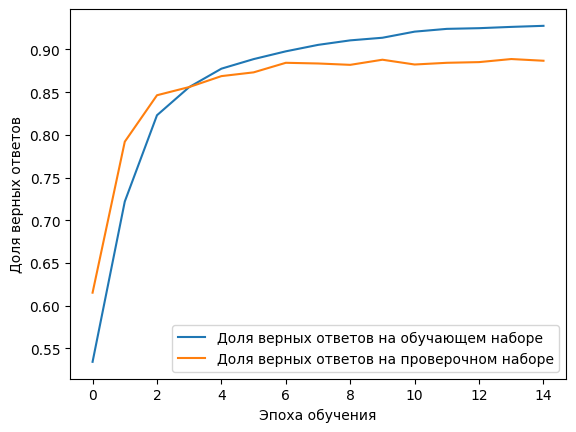

In [16]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [17]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.8755 - loss: 0.2954


## Исследуем обученное плотное векторное представление слов

Получаем матрицу плотных векторных представлений слов shape=(10000, 3)

In [18]:
embedding_matrix = model.layers[0].get_weights()[0]

In [19]:
embedding_matrix[:5]

array([[-0.00350722, -0.00523826, -0.00585363],
       [ 0.07712835,  0.06977563,  0.09671914],
       [-0.01931   ,  0.02760193,  0.01693566],
       [ 0.00179621,  0.04507104, -0.03230889],
       [ 0.03316839, -0.011908  , -0.01418554]], dtype=float32)

Загружаем словарь с номерами слов

In [20]:
imdb_word_index = imdb.get_word_index()

Дополняем словарь служебными символами

In [21]:
word_index = {
    "<Заполнитель>": 0,
    "<Начало последовательности>": 1,
    "<Не используется>": 3
}
for word, number in imdb_word_index.items():
    word_index[word] = number + 3

Ищем векторы для слов

In [22]:
word = 'good'
word_number = word_index[word]
print('Номер слова', word_number)
print('Вектор для слова', embedding_matrix[word_number])

Номер слова 52
Вектор для слова [ 0.13356103 -0.13285759 -0.12754007]


In [23]:
word = 'bad'
word_number = word_index[word]
print('Номер слова', word_number)
print('Вектор для слова', embedding_matrix[word_number])

Номер слова 78
Вектор для слова [-0.43587282  0.2629682   0.463111  ]


## Визуализация плотных векторных представлений слов

Посмотрим распределение всех обученных векторов слов 

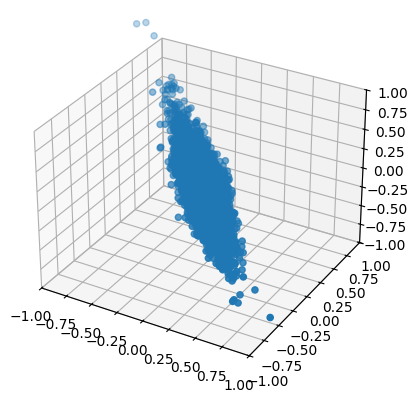

In [70]:
ax = plt.axes(projection="3d")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.scatter(embedding_matrix[:, 0], embedding_matrix[:, 1], embedding_matrix[:, 2])

Видим что векторы слов разместились таким образом чтобы максимально соответствовать задаче бинарной классификации определения эмоционального окраса

Выбираем коды слов, по которым можно определить тональность отзыва

In [36]:
review = ['brilliant', 'fantastic', 'amazing', 'good',
          'bad', 'awful', 'crap', 'terrible', 'trash']
enc_review = []
for word in review:
    enc_review.append(word_index[word])
enc_review

[530, 777, 480, 52, 78, 373, 595, 394, 1157]

Получаем векторное представление интересующих нас слов

In [37]:
review_vectors = embedding_matrix[enc_review]
review_vectors

array([[ 0.48336098, -0.30535692, -0.44109848],
       [ 0.51709354, -0.37124482, -0.49472705],
       [ 0.5344114 , -0.51308465, -0.5784051 ],
       [ 0.13356103, -0.13285759, -0.12754007],
       [-0.43587282,  0.2629682 ,  0.463111  ],
       [-1.0236615 ,  0.9056663 ,  1.075264  ],
       [-0.4465028 ,  0.47940284,  0.49648574],
       [-0.58790094,  0.5452564 ,  0.74839556],
       [-0.23926103,  0.07585713,  0.3168864 ]], dtype=float32)

Визуализируем векторное представление интересующих нас слов

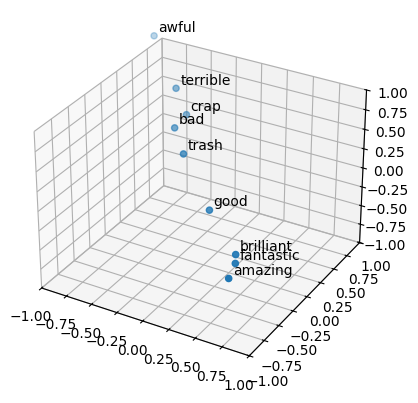

In [69]:
ax = plt.axes(projection="3d")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.scatter(review_vectors[:, 0], review_vectors[:, 1], review_vectors[:, 2])
for i, txt in enumerate(review):
    ax.annotate3D(txt, (review_vectors[i, 0], review_vectors[i, 1], review_vectors[i, 2]), xytext=(3, 3), textcoords='offset points')

Классическая задача на семантическую проверку векторов представлений слов

In [71]:
king = embedding_matrix[word_index["king"]]
man = embedding_matrix[word_index["man"]]
woman = embedding_matrix[word_index["woman"]]
queen = embedding_matrix[word_index["queen"]]

queen_predicted = king - man + woman
queen_predicted

array([-0.20408392,  0.19829415,  0.15071905], dtype=float32)

Визуализируем вектор слова queen полученный в ходе арифметических операций и сформированный обучением

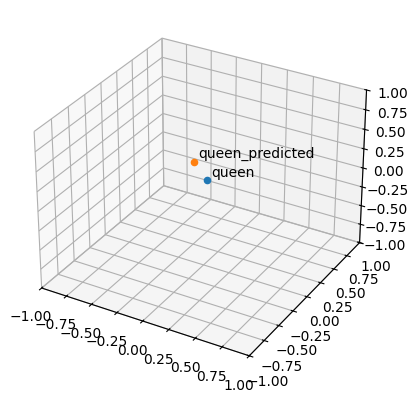

In [72]:
ax = plt.axes(projection="3d")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.scatter(queen[0], queen[1], queen[2])
ax.annotate3D('queen', (queen[0], queen[1], queen[2]), xytext=(3, 3), textcoords='offset points')

ax.scatter(queen_predicted[0], queen_predicted[1], queen_predicted[2])
ax.annotate3D('queen_predicted', (queen_predicted[0], queen_predicted[1], queen_predicted[2]), xytext=(3, 3), textcoords='offset points')

Расхождение существенное, что не удивительно учитывая что модель обучалась определять только эмоциональный окрас игнорируя другие признаки, и существовало всего 2 класса для классификации.